In [8]:
from google.colab import drive
drive.mount('/content/drive')
!ln -s "/content/drive/My Drive/Academic/CSCM45J - Big Data & Machine Learning/Lab 3/wineData-1.npy" "/content/"
!ln -s "/content/drive/My Drive/Academic/CSCM45J - Big Data & Machine Learning/Lab 3/wineLabels-1.npy" "/content/"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
ln: failed to create symbolic link '/content/wineData-1.npy': File exists
ln: failed to create symbolic link '/content/wineLabels-1.npy': File exists


In [10]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt


from sklearn.svm import SVC

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,\
     Dropout,Flatten,Dense,Activation,\
     BatchNormalization


Task 4.1

(178, 13)
(142, 13)
13.029084507042253
0.598208316802222
(13,)
7.843491114816599e-15
1.0000000000000007
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Accuracy : 1.0


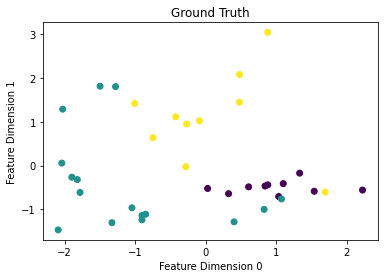

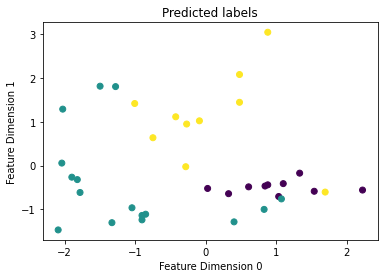

In [11]:
from numpy.ma.core import size
wine_data = np.load('wineData-1.npy')
wine_labels = np.load('wineLabels-1.npy')
print(wine_data.shape) # (178, 13)

""" Split dataset into training and testing """
x_train,x_test,y_train,y_test = train_test_split(wine_data, wine_labels, train_size=0.8) # 0.8 >> 80% for training
print(x_train.shape) # (142, 13)
print(np.mean(x_train[:,0]))
print(np.var(x_train[:,0]))

""" Data standardization """
scaler = StandardScaler()
# Calculate mean and variance of each feature for further pre-processing
scaler.fit(X = x_train, y = y_train) 
print(scaler.mean_.shape) # (13,)
# Standardize data (Centering and Scaling)
x_train_standard = scaler.transform(X = x_train)
x_test_standard = scaler.transform(X = x_test)
print(np.mean(x_train_standard[:,0]))
print(np.var(x_train_standard[:,0]))

""" Train Support Vector Machine Classifier """
svc = SVC(C = 1, kernel = 'rbf') # Kernel = Radial Basis Function Kernel(Gaussian Kernel)
# Train the model using training data
svc.fit(X = x_train_standard, y = y_train) 
# Predict labels from trained model
y_hat = svc.predict(X = x_test_standard)
# Calculate accuracy
diff = y_test - y_hat
print(diff)
accuracy = svc.score(X = x_test_standard, y = y_test)
print(f'Accuracy : {accuracy}')


""" Scatter Plot """
plt.figure()
plt.title(label = 'Ground Truth')
plt.xlabel(xlabel = 'Feature Dimension 0')
plt.ylabel(ylabel = 'Feature Dimension 1')
plt.scatter(x = x_test_standard[:,0], y = x_test_standard[:,1], c = y_test-1)
plt.figure()
plt.title(label = 'Predicted labels')
plt.xlabel(xlabel = 'Feature Dimension 0')
plt.ylabel(ylabel = 'Feature Dimension 1')
plt.scatter(x = x_test_standard[:,0], y = x_test_standard[:,1], c = y_hat-1)
plt.show()






Task 4.2

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 13)                182       
                                                                 
 dense_9 (Dense)             (None, 3)                 42        
                                                                 
Total params: 224
Trainable params: 224
Non-trainable params: 0
_________________________________________________________________


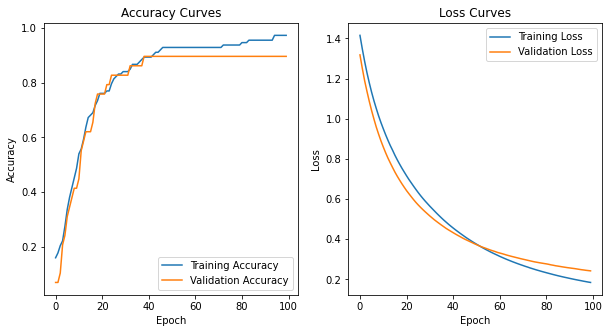

2/2 [==============================] - 0s 5ms/step - loss: 0.2296 - sparse_categorical_accuracy: 0.8889
Test set loss: 0.23, test set accuracy: 88.89%


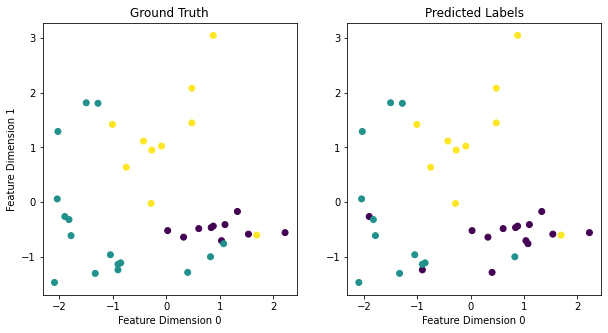

In [12]:
""" Define ANN Model """
model = tf.keras.Sequential(layers=[
    tf.keras.layers.Dense(13, activation=tf.nn.relu),
    tf.keras.layers.Dense(len(np.unique(y_train)), activation=tf.nn.softmax)])

""" Compile Model """
model.compile(optimizer=tf.keras.optimizers.SGD(), # Strochastic Gradient Descent
              loss=tf.keras.losses.SparseCategoricalCrossentropy(), # Cross Entrophy Function
              metrics=tf.keras.metrics.SparseCategoricalAccuracy()) # Consider Model Accuracy

""" Train The Model """
history = model.fit(x_train_standard, y_train, epochs=100, validation_split=0.2, verbose=0)

""" Print The Summary """
model.summary()

"""  Plot Accuracy And Loss Curves """
plt.figure(figsize=[10,5])
plt.subplot(121)
plt.plot(history.history['sparse_categorical_accuracy'])
plt.plot(history.history['val_sparse_categorical_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy',
           'Validation Accuracy'])
plt.title('Accuracy Curves')

plt.subplot(122)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training Loss',
           'Validation Loss'])
plt.title('Loss Curves')
plt.show()


""" Evaluate With Test Datatset """
results = model.evaluate(x_test_standard, y_test)
print(f'Test set loss: {results[0]:0.2f}, test set accuracy: {results[1]*100:0.2f}%')

""" Scatter Plot """
plt.figure(figsize=[10,5])
plt.subplot(121)
plt.scatter(x = x_test_standard[:,0], y = x_test_standard[:,1], c = y_test-1)
plt.ylabel('Feature Dimension 1')
plt.xlabel('Feature Dimension 0')
plt.title('Ground Truth')
plt.subplot(122)
plt.title('Predicted Labels')
plt.xlabel('Feature Dimension 0')
plt.scatter(x = x_test_standard[:,0], y = x_test_standard[:,1], c=np.argmax(model.predict(x_test_standard), axis=1))
plt.show()



Task 4.3

(60000, 28, 28)
(60000, 784)
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (32, 20)                  15700     
                                                                 
 dense_11 (Dense)            (32, 10)                  210       
                                                                 
Total params: 15,910
Trainable params: 15,910
Non-trainable params: 0
_________________________________________________________________


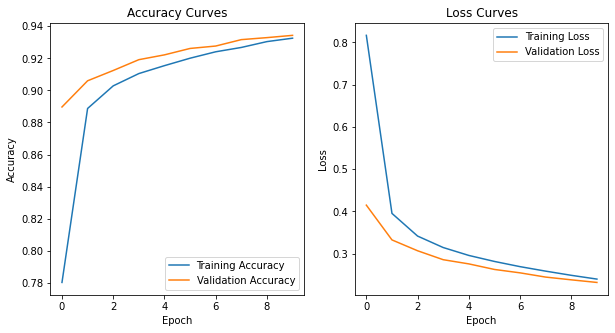

313/313 [==============================] - 1s 2ms/step - loss: 0.2337 - sparse_categorical_accuracy: 0.9323
Test set loss: 0.23, test set accuracy: 93.23%
[7 2 1 ... 4 5 6]
[7 2 1 ... 4 5 6]


In [13]:
""" Load Dataset """
(x_train_mnist, y_train_mnist), (x_test_mnist, y_test_mnist) = tf.keras.datasets.mnist.load_data()
print(x_train_mnist.shape) # (6000, 28, 28)
number_of_labels = len(np.unique(y_train_mnist))

""" Flattern Datatset """
x_train_mnist_flatterned = np.reshape(a = x_train_mnist, newshape=(x_train_mnist.shape[0], -1))
x_test_mnist_flatterned = np.reshape(a = x_test_mnist, newshape=(x_test_mnist.shape[0], -1))
print(x_train_mnist_flatterned.shape)

""" Normalized Datatset """
max_pixel_value = np.max(x_train_mnist_flatterned)
x_train_mnist_normalized = x_train_mnist_flatterned/max_pixel_value
x_test_mnist_normalized = x_test_mnist_flatterned/max_pixel_value

""" Define ANN Model """
model = tf.keras.Sequential(layers=[
    tf.keras.layers.Dense(20, activation=tf.nn.relu), # 1st hidden layer : 784 neurons
    tf.keras.layers.Dense(number_of_labels, activation=tf.nn.softmax)]) # output layer : 3 neurons

""" Compile Model """
model.compile(optimizer=tf.keras.optimizers.SGD(), # Strochastic Gradient Descent
              loss=tf.keras.losses.SparseCategoricalCrossentropy(), # Cross Entrophy Function
              metrics=tf.keras.metrics.SparseCategoricalAccuracy()) # Consider Model Accuracy

""" Train The Model """
history = model.fit(x_train_mnist_normalized, y_train_mnist, epochs=10, validation_split=0.2, verbose=0)

""" Print The Summary """
model.summary()

"""  Plot Accuracy And Loss Curves """
plt.figure(figsize=[10,5])
plt.subplot(121)
plt.plot(history.history['sparse_categorical_accuracy'])
plt.plot(history.history['val_sparse_categorical_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy',
           'Validation Accuracy'])
plt.title('Accuracy Curves')

plt.subplot(122)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training Loss',
           'Validation Loss'])
plt.title('Loss Curves')
plt.show()


""" Evaluate With Test Datatset """
results = model.evaluate(x_test_mnist_normalized, y_test_mnist)
print(f'Test set loss: {results[0]:0.2f}, test set accuracy: {results[1]*100:0.2f}%')

""" Analyse Training Cureves """
print(y_test_mnist)
print(np.argmax(model.predict(x_test_mnist_normalized), axis=1))


Task 4.4

(60000, 28, 28, 1)
(10000, 28, 28, 1)
Epoch 1/5
1500/1500 [==============================] - 134s 89ms/step - loss: 0.5608 - sparse_categorical_accuracy: 0.8320 - val_loss: 0.1677 - val_sparse_categorical_accuracy: 0.9478
Epoch 2/5
1500/1500 [==============================] - 131s 87ms/step - loss: 0.1207 - sparse_categorical_accuracy: 0.9625 - val_loss: 0.1338 - val_sparse_categorical_accuracy: 0.9582
Epoch 3/5
1500/1500 [==============================] - 131s 87ms/step - loss: 0.0831 - sparse_categorical_accuracy: 0.9739 - val_loss: 0.0806 - val_sparse_categorical_accuracy: 0.9741
Epoch 4/5
1500/1500 [==============================] - 131s 87ms/step - loss: 0.0640 - sparse_categorical_accuracy: 0.9806 - val_loss: 0.0680 - val_sparse_categorical_accuracy: 0.9777
Epoch 5/5
1500/1500 [==============================] - 132s 88ms/step - loss: 0.0534 - sparse_categorical_accuracy: 0.9835 - val_loss: 0.0631 - val_sparse_categorical_accuracy: 0.9799
Model: "sequential_6"
____________________

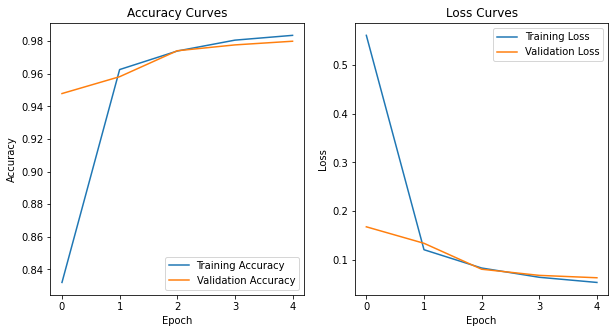

313/313 [==============================] - 7s 22ms/step - loss: 8.3836 - sparse_categorical_accuracy: 0.9838
Test set loss: 8.38, test set accuracy: 98.38%
[7 2 1 ... 4 5 6]
[7 2 1 ... 4 5 6]


In [14]:
""" Expand Dimension For Channel """
x_train_mnist_expand = np.expand_dims(a = x_train_mnist, axis = 3)
x_test_mnist_expand = np.expand_dims(a = x_test_mnist, axis = 3)
print(x_train_mnist_expand.shape)
print(x_test_mnist_expand.shape)

""" Normalize Pixel Values """
max_pixel_value = np.max(x_train_mnist_expand)
x_train_mnist_cnn_norm = x_train_mnist_expand/max_pixel_value
x_test_mnist_cnn_norm = x_test_mnist_expand/max_pixel_value

""" Define Image Sizes """
Image_Width=28 # pixel width of image.
Image_Height=28 # pixel height of image.
Image_Size=(Image_Width,Image_Height) # resolution of image.
Image_Channels=1 # number of colour channels in images.

""" Define CNN Architecture : 2D CNN Layers"""
model = Sequential()

### Feature Extraction Layers = Convolutional-Subsampling Pairs (Increase number of feature maps for each subsequent pairs)
model.add(Conv2D(filters=24,kernel_size=5,strides=1,padding='same',activation='relu', input_shape=(Image_Width,Image_Height,Image_Channels)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=48,kernel_size=5,strides=1,padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=64,kernel_size=5,strides=1,padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

### Classification Layers = Dense Layers
model.add(Flatten())
model.add(Dense(256,activation=tf.nn.relu))
model.add(Dense(10,activation=tf.nn.softmax))

model.compile(optimizer=tf.keras.optimizers.SGD(), # Strochastic Gradient Descent
              loss=tf.keras.losses.SparseCategoricalCrossentropy(), # Cross Entrophy Function
              metrics=tf.keras.metrics.SparseCategoricalAccuracy()) # Consider Model Accuracy


""" Train The Model """
history = model.fit(x_train_mnist_cnn_norm, y_train_mnist, epochs=5, validation_split=0.2, verbose=1)

""" Print The Summary """
model.summary()

"""  Plot Accuracy And Loss Curves """
plt.figure(figsize=[10,5])
plt.subplot(121)
plt.plot(history.history['sparse_categorical_accuracy'])
plt.plot(history.history['val_sparse_categorical_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy',
           'Validation Accuracy'])
plt.title('Accuracy Curves')

plt.subplot(122)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training Loss',
           'Validation Loss'])
plt.title('Loss Curves')
plt.show()


""" Evaluate With Test Datatset """
results = model.evaluate(x_test_mnist_expand, y_test_mnist)
print(f'Test set loss: {results[0]:0.2f}, test set accuracy: {results[1]*100:0.2f}%')

""" Analyse Training Cureves """
print(y_test_mnist)
print(np.argmax(model.predict(x_test_mnist_expand), axis=1))


**Apendix** 


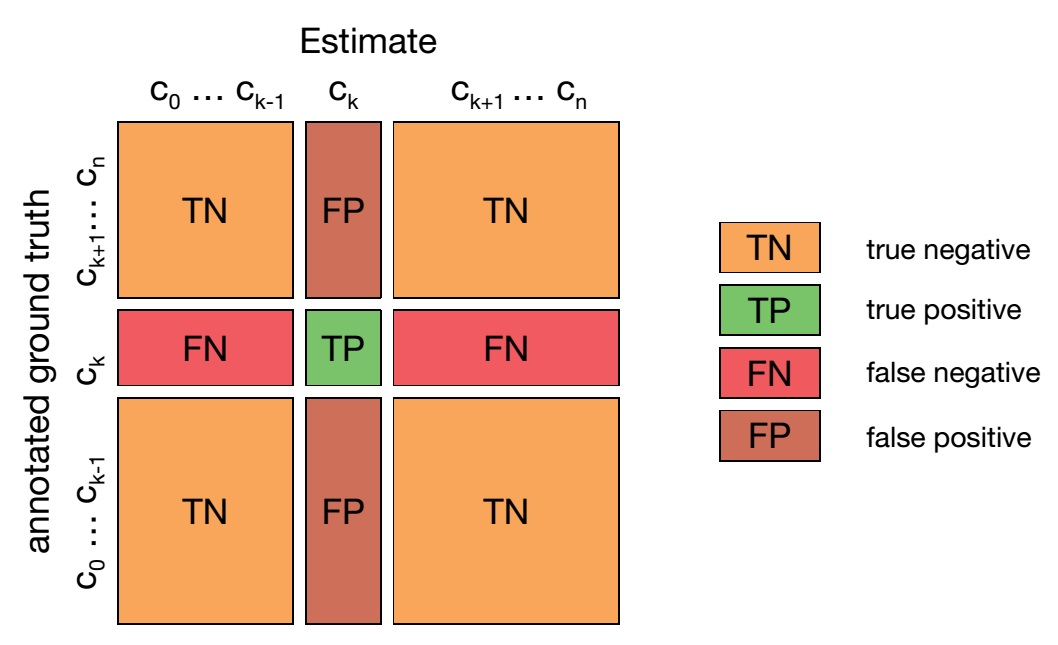



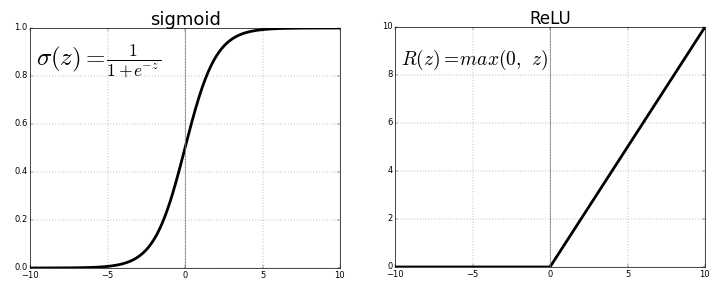

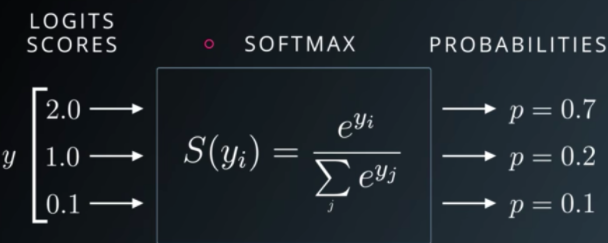